# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak) using the image data modification notebook:
https://github.com/UdityaRaj11/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** we start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-28 17:59:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.9MB/s    in 3.4s    

2023-07-28 17:59:39 (30.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' . ")

There are 2 directories and 0 images in 'pizza_steak' . 
There are 2 directories and 0 images in 'pizza_steak/test' . 
There are 0 directories and 250 images in 'pizza_steak/test/steak' . 
There are 0 directories and 250 images in 'pizza_steak/test/pizza' . 
There are 2 directories and 0 images in 'pizza_steak/train' . 
There are 0 directories and 750 images in 'pizza_steak/train/steak' . 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' . 


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 383, 3)


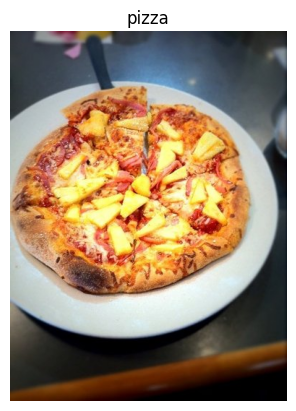

In [ ]:
# View random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 6,  9,  2],
        [ 4,  7,  0],
        [ 2,  5,  0]],

       [[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 4,  7,  0],
        [ 4,  7,  0],
        [ 3,  6,  0]],

       [[ 3,  4,  0],
        [ 4,  5,  0],
        [ 5,  6,  1],
        ...,
        [ 2,  4,  0],
        [ 3,  5,  0],
        [ 5,  7,  2]],

       ...,

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 5, 13,  0],
        [ 5, 13,  0]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.02352941, 0.03529412, 0.00784314],
        [0.01568627, 0.02745098, 0.        ],
        [0.00784314, 0.01960784, 0.        ]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.01568627, 0.02745098, 0.        ],
        [0.01568627, 0.02745098, 0.        ],
        [0.01176471, 0.02352941, 0.        ]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.00784314, 0.01568627, 0.        ],
        [0.01176471, 0.01960784, 0.        ],
        [0.01960784, 0.02745098, 0.00784314]],

       ...,

       [[0.00784314, 0.02745098, 0.00392157],
        [0.01176471, 0.03137255, 0.00784314],
        [0.01176471, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to out training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also called normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 160ms/step - loss: 0.5699 - accuracy: 0.7087 - val_loss: 0.4428 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4543 - accuracy: 0.8020 - val_loss: 0.3901 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4297 - accuracy: 0.8140 - val_loss: 0.4003 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3992 - accuracy: 0.8247 - val_loss: 0.3598 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3836 - accuracy: 0.8313 - val_loss: 0.3373 - val_accuracy: 0.8600


**Note:** If the above cell is taking longer than ~10 seconda per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU
(you may have to return some cells above).

In [ ]:
#Epoch 1/5
#47/47 [==============================] - 141s 3s/step - loss: 0.6292 - accuracy: 0.6273 - val_loss: 0.4547 - val_accuracy: 0.7860

In [ ]:
# Get a model Summary
model_1.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's build a good old classification model to see if it works with our image data.

The model we're build is from tensorflow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 215ms/step - loss: 0.7664 - accuracy: 0.5233 - val_loss: 0.6741 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.6669 - accuracy: 0.6487 - val_loss: 0.6534 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6428 - accuracy: 0.6487 - val_loss: 0.6214 - val_accuracy: 0.7040
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6096 - accuracy: 0.7180 - val_loss: 0.5894 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5911 - accuracy: 0.7447 - val_loss: 0.5681 - val_accuracy: 0.7580


In [ ]:
# get a summary of model_2
model_2.summary();


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 5)                 752645    
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 752,711
Trainable params: 752,711
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than out CNN(model_1), model_2 performs terribly.. let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 2.6368 - accuracy: 0.6573 - val_loss: 1.0442 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 1.6527 - accuracy: 0.6853 - val_loss: 0.4486 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5425 - accuracy: 0.7727 - val_loss: 0.4815 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.5009 - accuracy: 0.7853 - val_loss: 0.7163 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5214 - accuracy: 0.7793 - val_loss: 0.4568 - val_accuracy: 0.8000


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visulize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment).

### 1. Become one with data

Image shape: (512, 512, 3)
Image shape: (306, 512, 3)


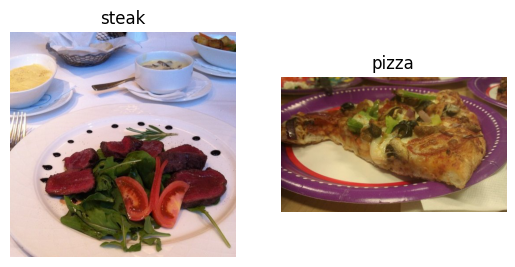

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model).

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at once, a model might only look at 32 at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn ver well.

why 32?

Because 32 is good for you health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target Directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in train_Data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (Start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which cureent model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get the summary of our model
model_4.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4.Fit the model


In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 233ms/step - loss: 0.6045 - accuracy: 0.7187 - val_loss: 0.4025 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4145 - accuracy: 0.8153 - val_loss: 0.3877 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.2644 - accuracy: 0.9007 - val_loss: 0.4167 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.0882 - accuracy: 0.9747 - val_loss: 0.4190 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.0221 - accuracy: 0.9967 - val_loss: 0.6120 - val_accuracy: 0.8080


### 5. Evaluating our model

it looks like our model is learning something, let's evaluate it.

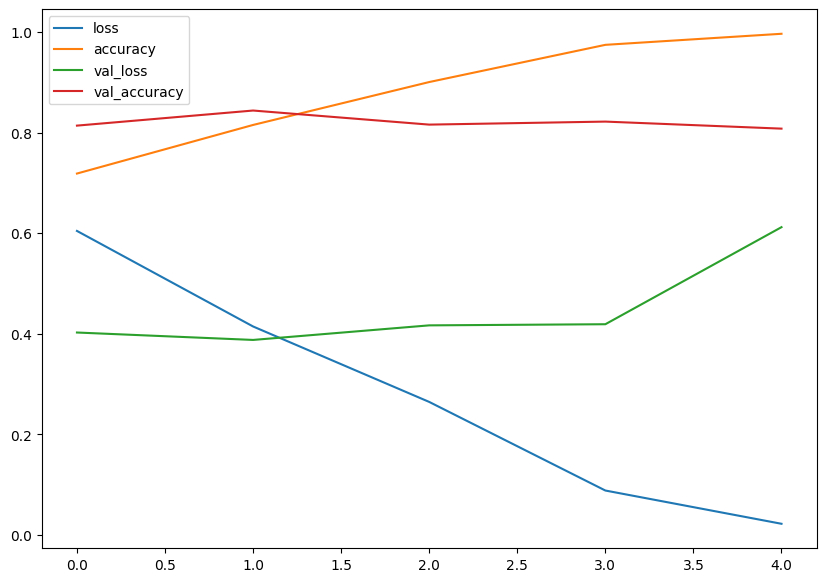

In [ ]:
# Let's plt the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

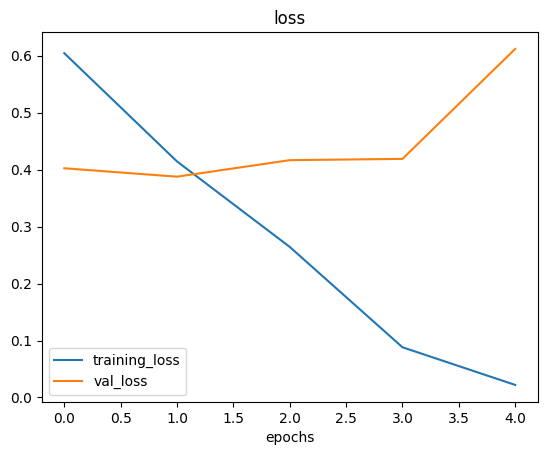

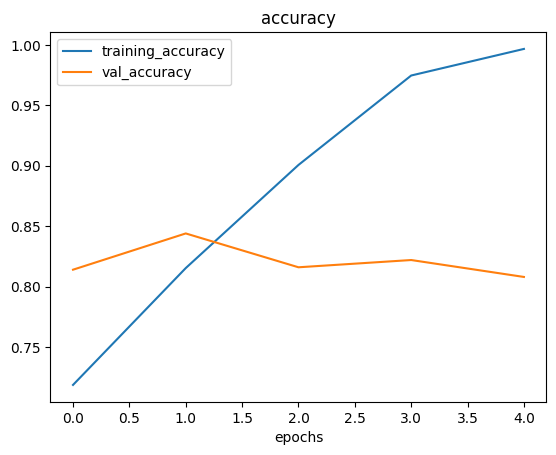

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentaion
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as regulization

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 212ms/step - loss: 0.5844 - accuracy: 0.6793 - val_loss: 0.4459 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4554 - accuracy: 0.7960 - val_loss: 0.4159 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4461 - accuracy: 0.7933 - val_loss: 0.4366 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4112 - accuracy: 0.8227 - val_loss: 0.3434 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3829 - accuracy: 0.8353 - val_loss: 0.3140 - val_accuracy: 0.8660


In [ ]:
# Get a summary of our model with maxx pooling
model_5.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

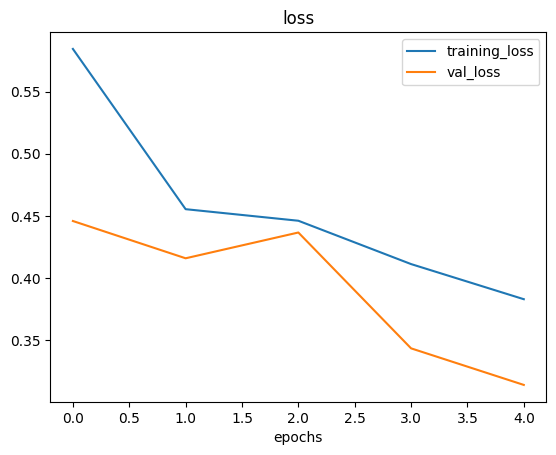

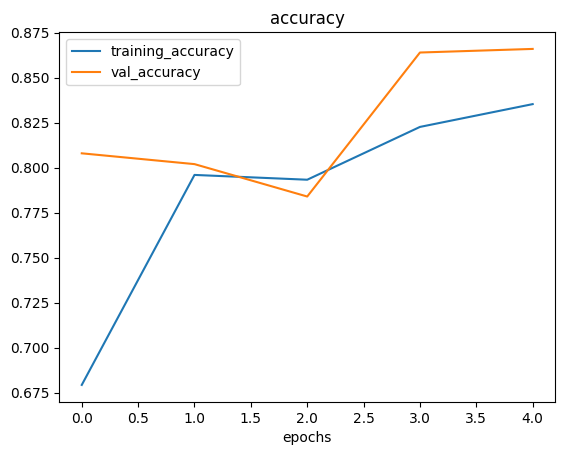

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentaion


In [ ]:
# Create ImageDataGenerator training instance with data augmentaion
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more genralizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visulaize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only
print("Non-augmented training data:")
# Create  non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                               )
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed o the training data, Using 'ImageDataGenerator' build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)


Showing image number:19


(-0.5, 223.5, 223.5, -0.5)

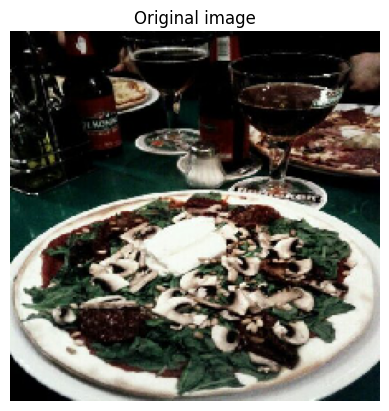

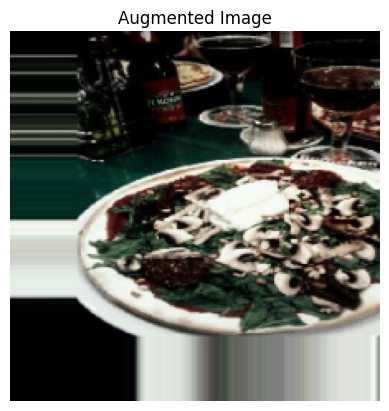

In [ ]:
# Show original image and augmented image
import random
random_number =  random.randint(0, 32) # our bacth size are 32...
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it goes

In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitiing model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 505ms/step - loss: 0.7398 - accuracy: 0.4807 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 555ms/step - loss: 0.6928 - accuracy: 0.5027 - val_loss: 0.6807 - val_accuracy: 0.5120
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.7149 - accuracy: 0.5033 - val_loss: 0.6818 - val_accuracy: 0.6200
Epoch 4/5
47/47 [==============================] - 31s 670ms/step - loss: 0.6919 - accuracy: 0.5267 - val_loss: 0.6669 - val_accuracy: 0.7220
Epoch 5/5
47/47 [==============================] - 26s 555ms/step - loss: 0.6811 - accuracy: 0.5773 - val_loss: 0.6687 - val_accuracy: 0.5160


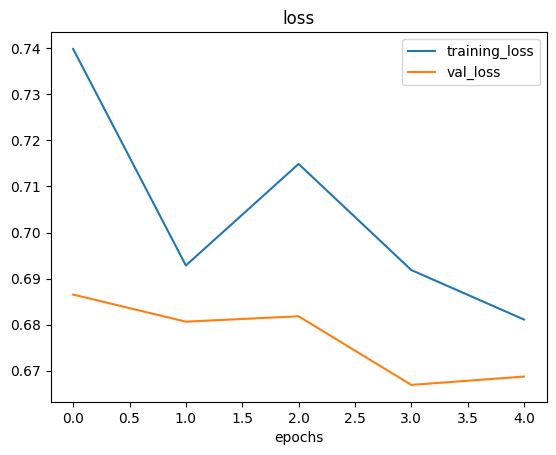

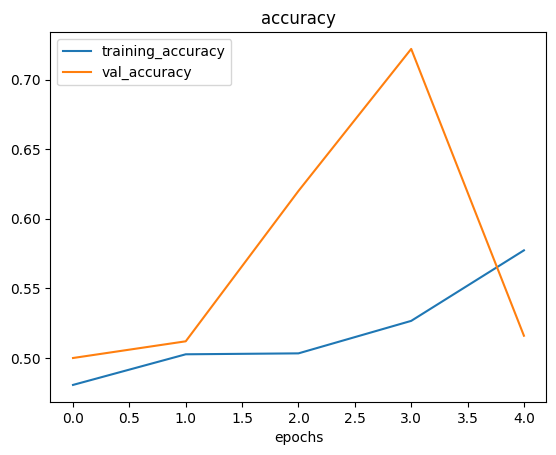

In [ ]:
# Check our models training curve
plot_loss_curves(history_6)

Let's shuffle our training data and train another model (same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 534ms/step - loss: 0.6488 - accuracy: 0.6173 - val_loss: 0.5413 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5428 - accuracy: 0.7340 - val_loss: 0.4187 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 24s 509ms/step - loss: 0.5143 - accuracy: 0.7440 - val_loss: 0.3562 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4846 - accuracy: 0.7707 - val_loss: 0.3337 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4764 - accuracy: 0.7727 - val_loss: 0.3327 - val_accuracy: 0.8620


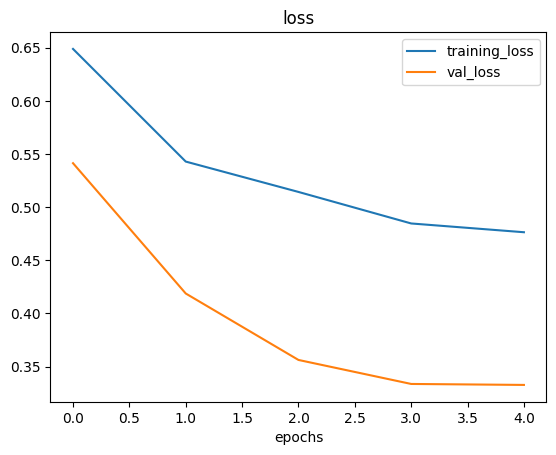

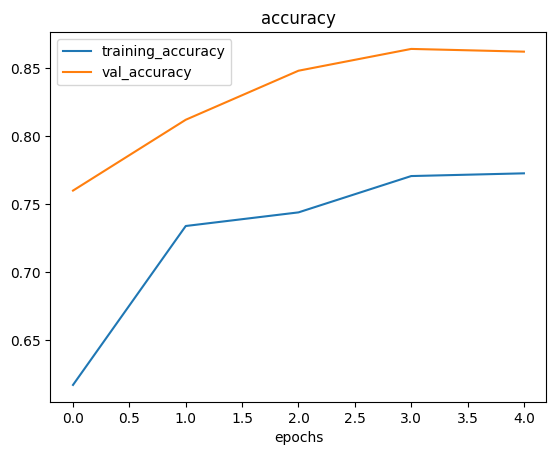

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more 'Conv2D'/'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **tranfer learning** to leverage what another image model had learn and adjust it for our own use case

In [ ]:
# Create a model
model_8 = Sequential([
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
47/47 [==============================] - 31s 575ms/step - loss: 0.6872 - accuracy: 0.5327 - val_loss: 0.6530 - val_accuracy: 0.7520
Epoch 2/15
47/47 [==============================] - 27s 575ms/step - loss: 0.6043 - accuracy: 0.6920 - val_loss: 0.5181 - val_accuracy: 0.8120
Epoch 3/15
47/47 [==============================] - 27s 567ms/step - loss: 0.5683 - accuracy: 0.7173 - val_loss: 0.5435 - val_accuracy: 0.7660
Epoch 4/15
47/47 [==============================] - 29s 629ms/step - loss: 0.5516 - accuracy: 0.7347 - val_loss: 0.4121 - val_accuracy: 0.8460
Epoch 5/15
47/47 [==============================] - 27s 579ms/step - loss: 0.5159 - accuracy: 0.7647 - val_loss: 0.4653 - val_accuracy: 0.8060
Epoch 6/15
47/47 [==============================] - 27s 580ms/step - loss: 0.5121 - accuracy: 0.7507 - val_loss: 0.4167 - val_accuracy: 0.8340
Epoch 7/15
47/47 [==============================] - 27s 575ms/step - loss: 0.4965 - accuracy: 0.7733 - val_loss: 0.4931 - val_accuracy: 0.7760

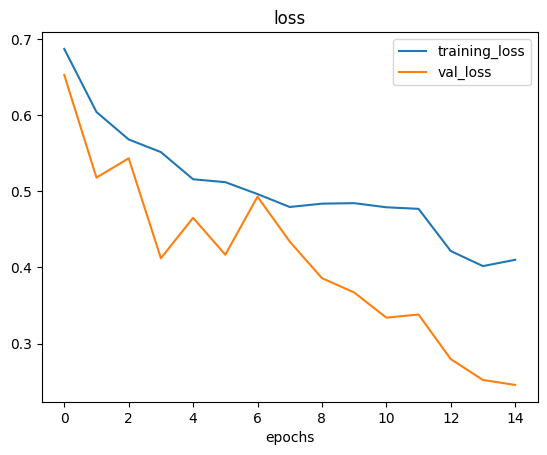

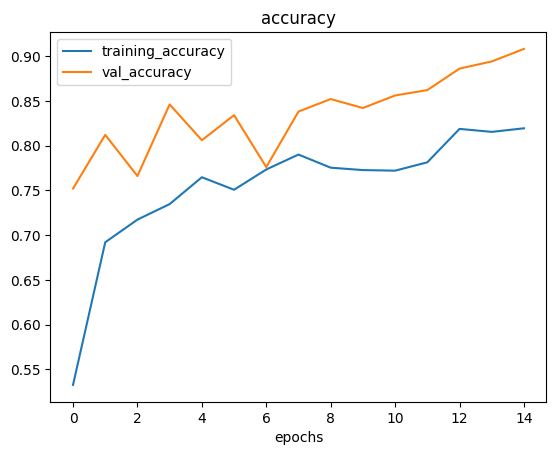

In [ ]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
!wget https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
steak = mpimg.imread("Grilled-steak.jpg")

--2023-05-16 18:34:16--  https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
Resolving www.firstforwomen.com (www.firstforwomen.com)... 192.0.66.160
Connecting to www.firstforwomen.com (www.firstforwomen.com)|192.0.66.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803602 (785K) [image/jpeg]
Saving to: ‘Grilled-steak.jpg.1’

Grilled-steak.jpg.1 100%[===================>] 784.77K  --.-KB/s    in 0.006s  

2023-05-16 18:34:16 (120 MB/s) - ‘Grilled-steak.jpg.1’ saved [803602/803602]



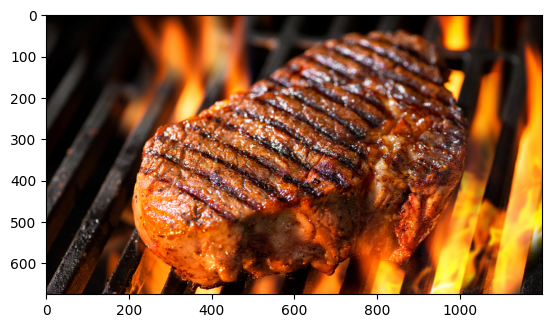

In [ ]:
plt.imshow(steak)

In [ ]:
# Check the shape of image
steak.shape

(675, 1200, 3)

**Note:** when you train a neural network and you want to make a prediction with it on your own custom data, it's important than you custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be abale to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("Grilled-steak.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00394783, 0.01173845, 0.00779999],
        [0.00393376, 0.00393376, 0.00183292],
        [0.00392438, 0.00392438, 0.00392438],
        ...,
        [0.05490196, 0.04230227, 0.02311192],
        [0.0609241 , 0.02955155, 0.01778684],
        [0.04458578, 0.02281218, 0.00784783]],

       [[0.00784314, 0.00784314, 0.00140056],
        [0.00574792, 0.00217962, 0.0039272 ],
        [0.00400035, 0.00400035, 0.00400035],
        ...,
        [0.05882353, 0.04705882, 0.02745098],
        [0.05648559, 0.03128815, 0.01746508],
        [0.05168074, 0.02030819, 0.00854349]],

       [[0.00771183, 0.01555497, 0.01141769],
        [0.0096029 , 0.01170374, 0.00175977],
        [0.00797444, 0.00810575, 0.        ],
        ...,
        [0.05515049, 0.04337172, 0.02379202],
        [0.06261379, 0.03124125, 0.01947654],
        [0.04856738, 0.01719483, 0.00543012]],

       ...,

       [[0.53381133, 0.5294629 , 0.4647135 ],
        [0.19

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 116ms/step


Looks like our custom image is being put through our model, let's visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predcited class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 67ms/step


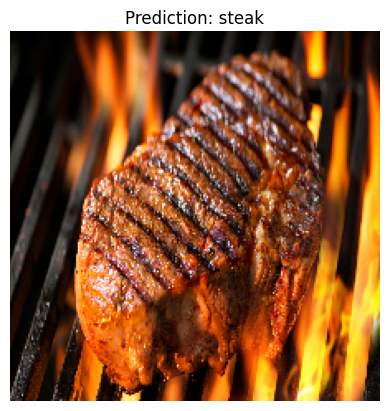

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "Grilled-steak.jpg")

In [ ]:
# Download another test cutom image and make a prediction on it
!wget https://images2.fanpop.com/images/photos/7100000/yum-yum-pizza-33-pizza-7105748-500-375.jpg

--2023-05-16 19:00:34--  https://images2.fanpop.com/images/photos/7100000/yum-yum-pizza-33-pizza-7105748-500-375.jpg
Resolving images2.fanpop.com (images2.fanpop.com)... 172.67.73.155, 104.26.10.178, 104.26.11.178
Connecting to images2.fanpop.com (images2.fanpop.com)|172.67.73.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144461 (141K) [image/jpeg]
Saving to: ‘yum-yum-pizza-33-pizza-7105748-500-375.jpg’

yum-yum-pizza-33-pi 100%[===================>] 141.08K  --.-KB/s    in 0.03s   

2023-05-16 19:00:34 (4.27 MB/s) - ‘yum-yum-pizza-33-pizza-7105748-500-375.jpg’ saved [144461/144461]

